In [1]:
# pip install shap

In [2]:
import pandas as pd
import modules

from modules import ml_functions

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle('../../data_lake/output/2_dp.pkl')

In [4]:
df.sample(1)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
SegFile,,,,,,,,,,,,,,,,,,,,,,,,
CTG0600.txt,148.0,148.0,0.0,2.0,2.0,75.0,0.6,0.0,10.7,0.0,0.0,0.0,32.0,140.0,172.0,1.0,0.0,150.0,150.0,151.0,0.0,-1.0,10.0,2.0


# 2.0 Data preparation

In [5]:
for i in df:
    if df[i].dtype == 'object':
        df[i] = df[i].astype(str)

In [6]:
df_ml = df.copy()

# 3.0 Modeling
## 3.1 Classe 1

In [7]:
class_nsp = 1.0

In [8]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [9]:
model, X_test, y_test = ml_functions.model_training(df_model)

(942, 23)
AUC Score:  0.5937824844074844
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar
GridSearchCV results...
Mean Train Scores: 
[0.99504299 0.99504299 0.99716764 0.99716764]

Mean Train CV Scores: 
[0.98159635 0.98301479 0.98301479 0.98301479]

Best Parameters: 
{'model__depth': 3, 'model__iterations': 1000}



Test results...
Model Test Accuracy: 0.9872881355932204
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['AC', 'ASTV', 'MSTV', 'ALTV', 'DP', 'Variance', 'Mode', 'Mean', 'UC', 'Min']


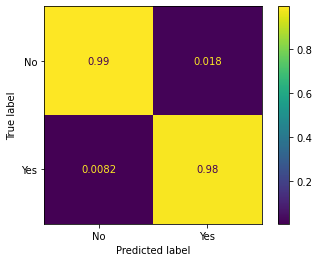

In [10]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [11]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

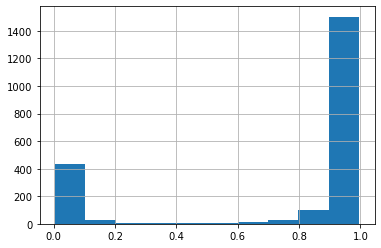

In [12]:
df['proba_classe_1.0'].hist()

## 3.2 Classe 2

In [13]:
class_nsp = 2.0

In [14]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [15]:
model, X_test, y_test = ml_functions.model_training(df_model)

(590, 23)
AUC Score:  0.5026144714527981
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar
GridSearchCV results...
Mean Train Scores: 
[0.9908752  0.99217729 0.99739073 0.99739073]

Mean Train CV Scores: 
[0.96339813 0.96339813 0.96864747 0.96864747]

Best Parameters: 
{'model__depth': 3, 'model__iterations': 400}



Test results...
Model Test Accuracy: 0.961352657004831
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['ALTV', 'AC', 'ASTV', 'Max', 'Nmax', 'Mean', 'Width', 'Variance', 'FM', 'MSTV']


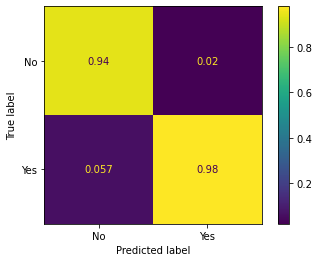

In [16]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [17]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

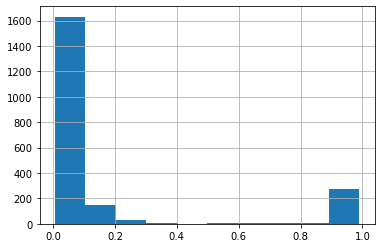

In [18]:
df['proba_classe_2.0'].hist()

## 3.3 Classe 3

In [19]:
class_nsp = 3.0

In [20]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [21]:
model, X_test, y_test = ml_functions.model_training(df_model)

(352, 23)
AUC Score:  0.5902353966870095
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar
GridSearchCV results...
Mean Train Scores: 
[1. 1. 1. 1.]

Mean Train CV Scores: 
[1. 1. 1. 1.]

Best Parameters: 
{'model__depth': 2, 'model__iterations': 400}



Test results...
Model Test Accuracy: 0.9919354838709677
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['Mean', 'ASTV', 'Median', 'DP', 'AC', 'MLTV', 'MSTV', 'ALTV', 'Variance', 'Mode']


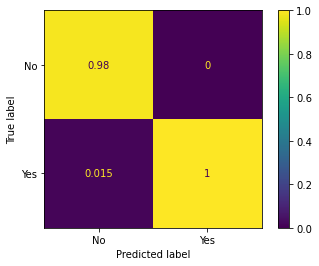

In [22]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [23]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

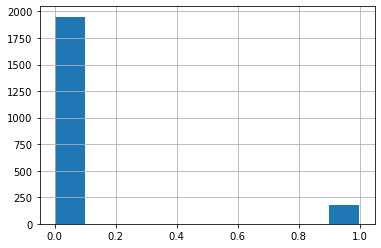

In [24]:
df['proba_classe_3.0'].hist()

# 4.0 Output

In [25]:
df.head(4)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,proba_classe_1.0,proba_classe_2.0,proba_classe_3.0
SegFile,,,,,,,,,,,,,,,,,,,,,,,,,,,
CTG0001.txt,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0,0.031732,0.588289,0.997039
CTG0002.txt,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0,0.992404,0.025655,0.000843
CTG0003.txt,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0,0.988382,0.029639,0.000946
CTG0004.txt,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0,0.987626,0.017963,0.000945


In [29]:
df.columns

Index(['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'CLASS', 'NSP', 'proba_classe_1.0',
       'proba_classe_2.0', 'proba_classe_3.0'],
      dtype='object')

In [28]:
cols = ['proba_classe_1.0','proba_classe_2.0', 'proba_classe_3.0']

In [36]:
test = df

In [37]:
test[cols] = test[cols].apply(lambda x: x / x.sum(),axis=1)

In [54]:
test.sample(4)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,proba_classe_1.0,proba_classe_2.0,proba_classe_3.0
SegFile,,,,,,,,,,,,,,,,,,,,,,,,,,,
CTG1222.txt,135.0,135.0,0.0,0.0,5.0,50.0,0.6,0.0,12.2,0.0,0.0,0.0,34.0,118.0,152.0,0.0,0.0,137.0,136.0,138.0,1.0,0.0,1.0,1.0,0.870803,0.121473,0.007724
CTG1739.txt,134.0,134.0,5.0,1.0,6.0,61.0,1.2,0.0,5.9,4.0,0.0,0.0,83.0,90.0,173.0,4.0,0.0,150.0,143.0,148.0,19.0,1.0,6.0,1.0,0.900027,0.085842,0.014131
CTG1933.txt,133.0,133.0,1.0,1.0,4.0,57.0,2.6,0.0,1.5,4.0,0.0,0.0,81.0,83.0,164.0,6.0,0.0,132.0,125.0,132.0,21.0,0.0,7.0,1.0,0.869154,0.120254,0.010592
CTG1509.txt,130.0,130.0,4.0,0.0,7.0,48.0,0.7,32.0,6.7,0.0,0.0,0.0,53.0,102.0,155.0,5.0,0.0,137.0,136.0,138.0,2.0,0.0,2.0,1.0,0.864327,0.129220,0.006453
